The __[Data Science Stack Exchange (DSEE)](https://datascience.stackexchange.com/)__ is a site solely devoted to learning and collaboration focused on the burgeoning field of data science. 

- People are encouraged to ask questions about any number of topics within the field. 
- Oftentimes, questions relate to troubleshooting an error message that arises in a person's code or requesting advice about a certain theory or methodology. 

In this project, we will review and analyze the __[public DSEE database](https://data.stackexchange.com/datascience/query/new)__ known as the Stack Exchange Data Explorer (SEDE). We hope to identify which topics within the field of data science are the most commonly asked and answered.

We will focus on the following columns in the dataset. To gather our data, we submit a query into the database. In the SQL (written in the Transact-SQL dialect, which is the SQL language accepted in the SEDE) query statement below, we specify that we would like to retrieve only questions (PostTypeId = 1) that were generated/posted in 2019. We saved this data into the file titled '2019stackexchange.csv'.

- <b>Id</b>: An identification number for the post.
- <b>PostTypeId</b>: An identification number for the type of post.
- <b>CreationDate</b>: The date and time of creation of the post.
- <b>Score</b>: The post's score.
- <b>ViewCount</b>: How many times the post was viewed.
- <b>Tags</b>: What tags were used.
- <b>AnswerCount</b>: How many answers the question got (only applicable to question posts).
- <b>FavoriteCoun</b>t: How many times the question was favored (only applicable to question posts). time of creation of the post.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\esait\Desktop\2019stackexchange.csv")
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,45387,2/11/2019 15:03,4,44,<data-mining><dataset><data-cleaning>,0,NaN
1,45389,2/11/2019 15:11,1,20,<machine-learning><decision-trees><tfidf>,1,NaN
2,45393,2/11/2019 16:02,1,579,<keras><tensorflow><cnn>,1,NaN
3,45394,2/11/2019 16:02,4,2787,<r><time-series><lstm><forecasting>,1,1.0
4,45400,2/11/2019 17:31,1,325,<machine-learning><python><scikit-learn>,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067 entries, 0 to 8066
Data columns (total 7 columns):
Id               8067 non-null int64
CreationDate     8067 non-null object
Score            8067 non-null int64
ViewCount        8067 non-null int64
Tags             8067 non-null object
AnswerCount      8067 non-null int64
FavoriteCount    1516 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 441.2+ KB


As we look over a few rows within the dataframe, we notice that the FavoriteCount column has several 'NaN'. In referring back to the orginal CSV file, those 'NaN' values signify that the question was not favored. We will update those 'NaN' values to 0.

In [4]:
df['FavoriteCount'] = df['FavoriteCount'].fillna(0)
df.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,45387,2/11/2019 15:03,4,44,<data-mining><dataset><data-cleaning>,0,0.0
1,45389,2/11/2019 15:11,1,20,<machine-learning><decision-trees><tfidf>,1,0.0
2,45393,2/11/2019 16:02,1,579,<keras><tensorflow><cnn>,1,0.0
3,45394,2/11/2019 16:02,4,2787,<r><time-series><lstm><forecasting>,1,1.0
4,45400,2/11/2019 17:31,1,325,<machine-learning><python><scikit-learn>,1,0.0
5,45404,2/11/2019 17:58,5,88,<cnn><multiclass-classification><alex-net>,3,0.0
6,45405,2/11/2019 18:30,2,53,<logistic-regression>,1,0.0
7,45408,2/11/2019 20:35,2,144,<gradient-descent><learning-rate>,2,0.0
8,45409,2/11/2019 20:37,1,145,<python><tensorflow><gradient-descent>,0,0.0
9,45410,2/11/2019 21:04,4,52,<pytorch><summarunner-architecture>,1,1.0


The Tags column holds great information for our analysis, but we must first clean it up to improve its readability and usability. 

In [5]:
cols_to_change = ['Tags']
for col in cols_to_change:
    df[col] = df[col].fillna(0)
    df[col] = df[col].str.replace("><", ", ").str.replace('[<->]',' ').str.split(",")
df.Tags.sample(5)

7987                  [ python,  neural-network,  keras ]
1768    [ machine-learning,  scikit-learn,  svm,  metr...
3911                   [ deep-learning,  gan,  gaussian ]
3639       [ probability,  model-selection,  geospatial ]
6613                      [ python,  pandas,  dataframe ]
Name: Tags, dtype: object

In [6]:
tag_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: "Frequency"}, inplace=True)
tag_count.head(15)

,Frequency
data-mining,180
dataset,256
data-cleaning,50
machine-learning,2381
decision-trees,63
tfidf,25
keras,742
tensorflow,368
cnn,106
r,203


In [7]:
popular_tag = tag_count.sort_values("Frequency", ascending=False).iloc[:15]
popular_tag

,Frequency
machine-learning,2381
python,1601
deep-learning,1023
neural-network,916
keras,742
classification,580
scikit-learn,432
nlp,376
tensorflow,368
time-series,357


In [8]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']


tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'ViewCount'}, inplace=True)
    
popular_views = tag_view_count.sort_values(by='ViewCount', ascending=False).iloc[:15]
popular_views


,ViewCount
python,1103168
machine-learning,731673
keras,424381
deep-learning,414706
neural-network,343075
pandas,286430
scikit-learn,235463
pandas,220173
classification,191385
tensorflow,174409


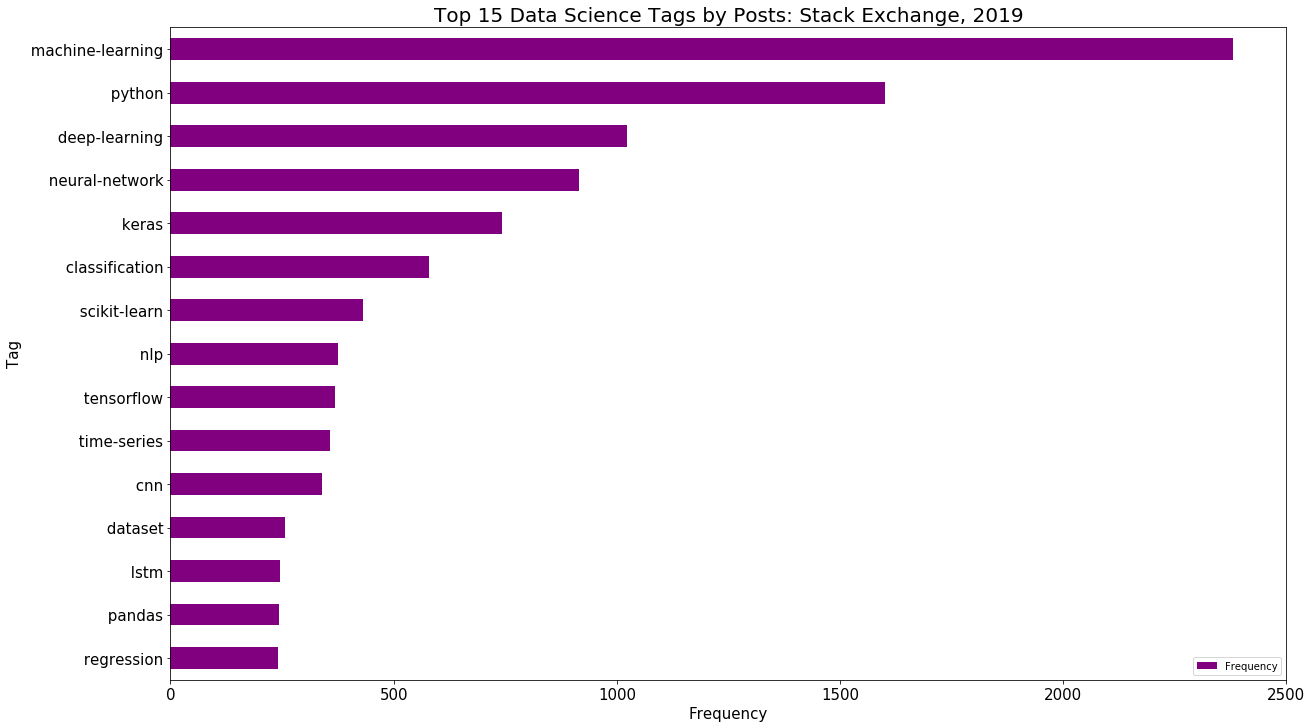

In [9]:
popular_tag.sort_values("Frequency").plot(kind='barh', figsize=(20,12), fontsize=15, color='purple')
plt.xlabel("Frequency", fontsize=15)
plt.ylabel('Tag', fontsize=15)
plt.title("Top 15 Data Science Tags by Posts: Stack Exchange, 2019", fontsize=20)
plt.show()

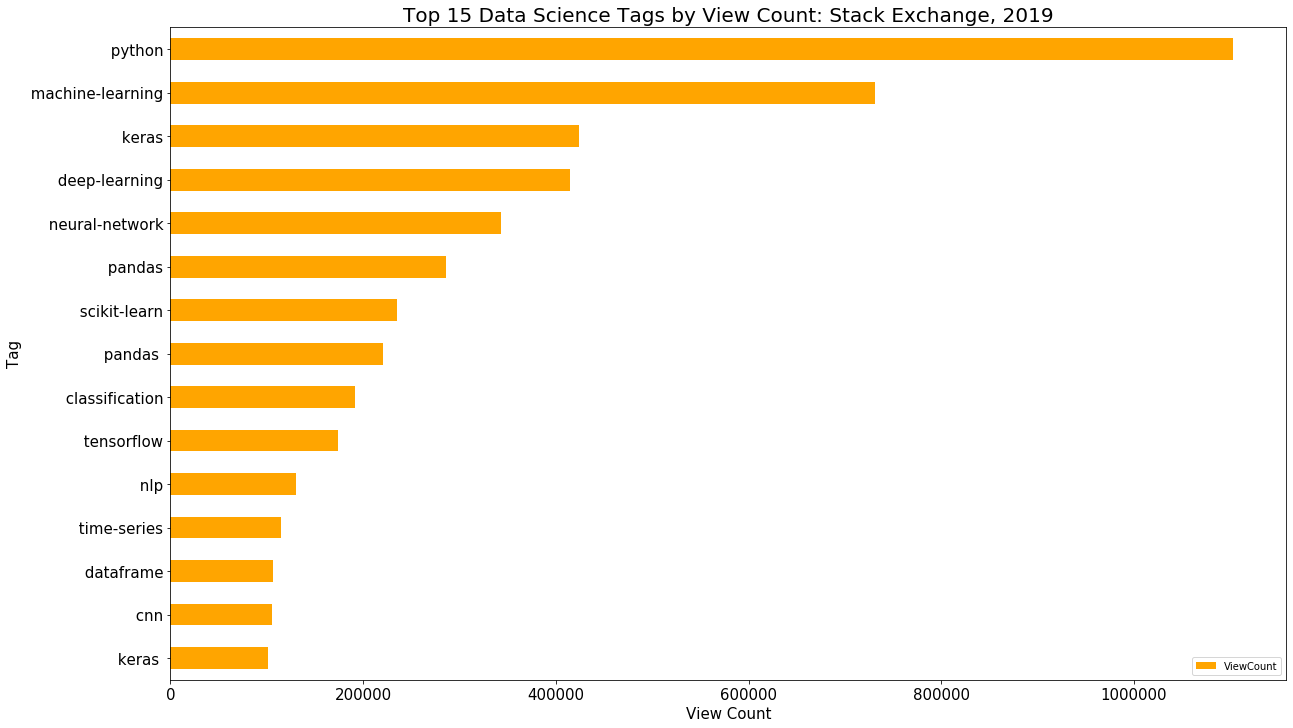

In [10]:
popular_views.sort_values("ViewCount").plot(kind='barh', figsize=(20,12), fontsize=15, color='orange')
plt.xlabel("View Count", fontsize=15)
plt.ylabel('Tag', fontsize=15)
plt.title("Top 15 Data Science Tags by View Count: Stack Exchange, 2019", fontsize=20)
plt.show()

By combining these two dataframes with a left join, we see that most of the top 15 tags by frequency of posts also generate the highest view counts. Three most frequently posted tags - dataset, lstm, and regression - do not fall within the highest tags by view count. 

In [11]:
top_tags = pd.merge(popular_tag, popular_views, how='left', left_index=True, right_index=True)
top_tags

,Frequency,ViewCount
machine-learning,2381,731673.0
python,1601,1103168.0
deep-learning,1023,414706.0
neural-network,916,343075.0
keras,742,424381.0
classification,580,191385.0
scikit-learn,432,235463.0
nlp,376,130781.0
tensorflow,368,174409.0
time-series,357,114603.0


In the top 15 tags that have the high view counts, there are three tags - pandas, dataframe, and keras - that are not in the most frequently posted tags.

In [12]:
top_tags2 = pd.merge(popular_tag, popular_views, how="right", left_index=True, right_index=True)
top_tags2

,Frequency,ViewCount
python,1601.0,1103168
machine-learning,2381.0,731673
keras,742.0,424381
deep-learning,1023.0,414706
neural-network,916.0,343075
pandas,243.0,286430
scikit-learn,432.0,235463
pandas,NaN,220173
classification,580.0,191385
tensorflow,368.0,174409


In [13]:
best_tags = np.intersect1d(popular_tag.index, popular_views.index)
print(best_tags)

[' classification' ' cnn' ' deep-learning' ' keras' ' machine-learning'
 ' neural-network' ' nlp' ' pandas' ' python' ' scikit-learn'
 ' tensorflow' ' time-series']


The following tags were simultaneously within the lists of top fifteen tags for number of posts and for view counts. 
- classification
- cnn
- deep-learning 
- keras
- machine-learning
- neural-network
- nlp
- pandas
- python
- scikit-learn
- tensorflow
- time-series


In [14]:
all_tags = list(tag_count.index)

In [15]:
connections = pd.DataFrame(index=all_tags, columns=all_tags)
connections.iloc[0:4,0:4]

,data-mining,dataset,data-cleaning,machine-learning
data-mining,NaN,NaN,NaN,NaN
dataset,NaN,NaN,NaN,NaN
data-cleaning,NaN,NaN,NaN,NaN
machine-learning,NaN,NaN,NaN,NaN


In [ ]:
connections.fillna(0, inplace=True)

for tags in df["Tags"]:
    connections.loc[tags, tags] += 1

In [17]:
relations_most_used = connections.loc[popular_tag.index, popular_tag.index]

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

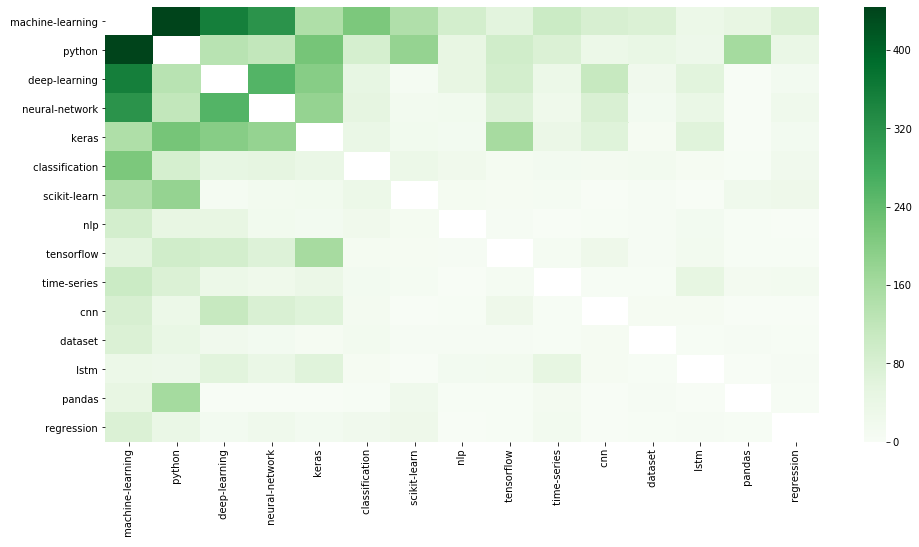

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The heatmap shows that the following tag pairings were the most frequent and commonly found. A few of the most popular pairings of tags are as follows:
- python and machine learning
- deep learning and python
- neural network adn deep learning
- machine learning and neural network
- python and keras
- machine learning and classification
- python and pandas